In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem

In [2]:
# Question 1: Generate Bitcoin Prices 
#    1.1) Generate 365 random numbers (precision = 2 digits) between $999.99 and $7,999.99 (Bitcoin Prices) 
#    1.2) Create a dataframe with 365 successive dates and random numbers (Date, Random Numbers from 1.1) 
#    1.3) Print the mean and median of the generated Bitcoin prices 
#    1.4) Print the dates for all the days where the price is greater than $5,000 
    
# Question 2: Invest in Bitcoin 
#    Write a function that does the following: 
#    2.1) Start with $10,000 in Cash Wallet and 0 units in Bitcoin Wallet. 
#    2.2) Day 1 - Buy $5,000 of Bitcoin. 
#         Day 2 - 365, Assume that you the price of Bitcoin going backward.
#          - If price increased for the last two days sell 50% of Bit Coin Wallet 
#          - Else if price reduced consecutively previous two days, buy Bitcoin using 50% of cash wallet.
#          - Otherwise, continue with no transaction. 
    
# What is your net worth in Dollars[Cash + Bitcoin] at the end of 365 days?

# Solution (Question 1)

In [62]:
#1.1)
bitcoin_prices = 7000 * np.random.rand(365) + 999.99
bitcoin_prices = np.round(bitcoin_prices, 2)

#1.2)
Bitcoins = {'Bitcoin Price': bitcoin_prices}

daily_bitcoin_prices = pd.DataFrame(Bitcoins, columns = ['Bitcoin Price'])
daily_bitcoin_prices.index += 1
daily_bitcoin_prices.index.names = ['Day']

print("Daily Bitcoin Prices (For The First 20 days)")
display(daily_bitcoin_prices.head(20).transpose())

#1.3)
mean   = daily_bitcoin_prices['Bitcoin Price'].mean()
median = daily_bitcoin_prices['Bitcoin Price'].median()

print("Mean Bitcoin Prices: \t%f" % mean)
print("Median Bitcoin Prices: \t%f\n" % median)

#1.4)
day_5000 = daily_bitcoin_prices['Bitcoin Price'] > 5000
print("Here are the days where bitcoin prices where above $5000.00:")
days_over_5000 = list(daily_bitcoin_prices[day_5000].index)

print_string   = ""
for i, day in enumerate(days_over_5000):
    if (i + 1) % 15 == 0:
        print_string += '\n'
    else:
        print_string += "%3d, " % day

print(print_string)

Daily Bitcoin Prices (For The First 20 days)


Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Bitcoin Price,7012.55,5859.25,3862.42,7490.92,7289.54,4876.36,4099.06,5839.87,4828.83,1910.67,7109.09,7940.65,2981.83,5783.54,1483.32,4888.14,1461.06,2412.09,1580.34,4851.63


Mean Bitcoin Prices: 	4473.926904
Median Bitcoin Prices: 	4464.040000

Here are the days where bitcoin prices where above $5000.00:
  1,   2,   4,   5,   8,  11,  12,  14,  24,  31,  32,  33,  39,  40, 
 43,  44,  45,  46,  47,  48,  50,  55,  58,  59,  61,  63,  66,  67, 
 71,  73,  74,  76,  77,  78,  79,  80,  82,  84,  89,  91,  92,  94, 
106, 107, 108, 117, 118, 119, 127, 128, 129, 131, 134, 136, 137, 139, 
148, 149, 150, 153, 154, 156, 159, 160, 162, 166, 167, 169, 172, 174, 
179, 180, 181, 182, 186, 191, 193, 195, 199, 200, 204, 205, 211, 213, 
220, 221, 223, 224, 229, 230, 231, 238, 241, 242, 243, 244, 246, 248, 
253, 255, 257, 258, 259, 263, 264, 268, 270, 275, 279, 280, 281, 282, 
286, 287, 290, 298, 302, 303, 304, 306, 311, 312, 315, 316, 320, 321, 
328, 329, 331, 332, 334, 335, 336, 341, 342, 343, 344, 349, 350, 351, 
359, 362, 365, 


# Solution (Question 2)

In [82]:
def run_strategy():
    current_cash = 10000
    current_bitcoins = 0

    cash_history     = []
    bitcoins_history = []

    for day in daily_bitcoin_prices.index:
        if day >= 2:
            current_bitcoin_price  = float(daily_bitcoin_prices.loc[day])
            previous_bitcoin_price = float(daily_bitcoin_prices.loc[day - 1])
        
            difference = current_bitcoin_price - previous_bitcoin_price
        
            if difference > 0:
                bitcoins_to_sell  = current_bitcoins / 2
                revenue           = current_bitcoin_price * bitcoins_to_sell
            
                current_bitcoins -= bitcoins_to_sell
                current_cash     += revenue 
            elif difference < 0:
                payment = current_cash / 2
                bitcoins_to_buy = payment / current_bitcoin_price
            
                current_bitcoins += bitcoins_to_buy
                current_cash     -= payment
        
            cash_history.append(current_cash)
            bitcoins_history.append(current_bitcoins)
        else:
            payment = 5000
            current_bitcoin_price = float(daily_bitcoin_prices.loc[day])
        
            current_cash     -= payment
            current_bitcoins += (payment / current_bitcoin_price)
        
            cash_history.append(current_cash)
            bitcoins_history.append(current_bitcoins)
        
    return current_cash, current_bitcoins, cash_history, bitcoins_history

current_cash, current_bitcoins, cash_history, bitcoins_history = run_strategy()

In [139]:
print("Current Cash: \t\t %0.2f " % current_cash)
print("Current Bitcoin Amount:      %0.2f" % current_bitcoins)

total_value = current_cash + current_bitcoins * daily_bitcoin_prices.loc[day]
print("Total Value: \t\t %0.2f" % total_value)

Current Cash: 		 13431582335510417408.00 
Current Bitcoin Amount:      1915056287549454.50
Total Value: 		 24353895215357100032.00


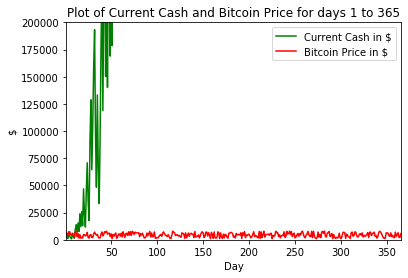

In [148]:
days           = list(daily_bitcoin_prices.index)
bitcoin_prices = daily_bitcoin_prices['Bitcoin Price']

plt.plot(days, cash_history,color = 'green', label = "Current Cash in $")
plt.plot(days, bitcoin_prices, color = 'red', label = 'Bitcoin Price in $')

plt.xlim(1, 365)
plt.ylim(0, 200000)

plt.xlabel("Day")
plt.ylabel("$")

plt.legend(loc = 'upper right')
plt.title("Plot of Current Cash and Bitcoin Price for days 1 to 365")

plt.show()


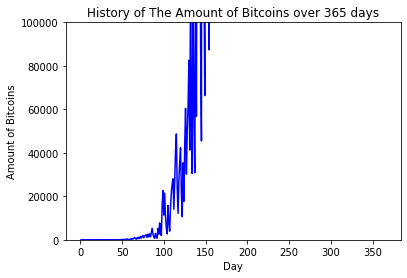

In [156]:
plt.plot(days, bitcoins_history, color = 'blue')
plt.ylabel("Amount of Bitcoins")
plt.xlabel("Day")
plt.title("History of The Amount of Bitcoins over 365 days")
plt.ylim(0, 100000)

plt.show()

In [149]:
# Based on the graphs above, this strategy is extremely good. However, this strategy is too simplistic because of the strategy implicitely uses
# the following simplistic assumptions:
#    1) You can buy and sell bitcoins instantaneously.
#    2) There is an unlimited number of bitcoins you can buy.